# Part A 


- Calculating loyalty points
On each day, there are 2 slots for each of which the loyalty points are to be calculated: S1 from 12am to 12pm S2 from 12pm to 12am" "Based on the above information and the data provided answer the following questions:

Find Playerwise Loyalty points earned by Players in the following slots:- a. 2nd October Slot S1 b. 16th October Slot S2 b. 18th October Slot S1 b. 26th October Slot S2
Calculate overall loyalty points earned and rank players on the basis of loyalty points in the month of October. In case of tie, number of games played should be taken as the next criteria for ranking.
What is the average deposit amount?
What is the average deposit amount per user in a month?
What is the average number of games played per user?"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Load all sheets into separate DataFrames

file_path = "Case_Study_Data.xlsx"  
data = pd.read_excel(file_path,sheet_name=None)

user_gameplay_data = data["User Gameplay data"]
deposit_data = data["Deposit Data"]
withdrawal_data = data["Withdrawal Data"]

In [3]:
user_gameplay_data.head()


,User ID,Games Played,Datetime
0,851,1,2022-01-10 00:00:00
1,717,1,2022-01-10 00:00:00
2,456,1,2022-01-10 00:00:00
3,424,1,2022-01-10 00:00:00
4,845,1,2022-01-10 00:00:00


In [4]:
deposit_data.head()


,User Id,Datetime,Amount
0,357,2022-01-10 00:03:00,2000
1,776,2022-01-10 00:03:00,2500
2,492,2022-01-10 00:06:00,5000
3,803,2022-01-10 00:07:00,5000
4,875,2022-01-10 00:09:00,1500


In [5]:
withdrawal_data.head()

,User Id,Datetime,Amount
0,190,2022-01-10 00:03:00,5872
1,159,2022-01-10 00:16:00,9540
2,164,2022-01-10 00:24:00,815
3,946,2022-01-10 00:29:00,23000
4,763,2022-01-10 00:40:00,9473


In [6]:
user_gameplay_data['User ID'].nunique()

1000

In [7]:
user_gameplay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355266 entries, 0 to 355265
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   User ID       355266 non-null  int64 
 1   Games Played  355266 non-null  int64 
 2   Datetime      355266 non-null  object
dtypes: int64(2), object(1)
memory usage: 8.1+ MB


In [8]:
deposit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17438 entries, 0 to 17437
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User Id   17438 non-null  int64 
 1   Datetime  17438 non-null  object
 2   Amount    17438 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 408.8+ KB


In [9]:
user_gameplay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355266 entries, 0 to 355265
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   User ID       355266 non-null  int64 
 1   Games Played  355266 non-null  int64 
 2   Datetime      355266 non-null  object
dtypes: int64(2), object(1)
memory usage: 8.1+ MB


In [10]:
# Define slot boundaries
s1_start = pd.Timestamp("12:00:00")
s1_end = pd.Timestamp("23:59:59")
s2_start = pd.Timestamp("00:00:00")
s2_end = pd.Timestamp("11:59:59")

In [11]:
# Helper function to determine slot
def get_slot(datetime):
    try:
        datetime_obj = pd.to_datetime(datetime, errors='coerce')  # Convert string to datetime
        if pd.isnull(datetime_obj):
            raise ValueError(f"Invalid datetime format: {datetime}")
        if s1_start.time() <= datetime_obj.time() <= s1_end.time():
            return "S1"
        elif s2_start.time() <= datetime_obj.time() <= s2_end.time():
            return "S2"
    except Exception as e:
        print(f"Error processing datetime: {datetime}, Error: {e}")
    return None

In [12]:
# Helper function to calculate loyalty points
def calculate_loyalty_points(event, deposit_amount=0, withdrawal_amount=0, num_deposits=0, num_withdrawals=0, games_played=0):
    if event == 'deposit' and deposit_amount > 0:
        return 0.01 * deposit_amount
    elif event == 'withdrawal' and withdrawal_amount > 0:
        return 0.005 * withdrawal_amount
    elif event == 'deposit_withdrawal_diff' and num_deposits >= 0 and num_withdrawals >= 0:
        return 0.001 * max(num_deposits - num_withdrawals, 0)
    elif event == 'games_played' and games_played > 0:
        return 0.2 * games_played
    return 0 

In [13]:
# Initialize dictionary to store loyalty points earned by players
loyalty_points = {}
deposit_data["Slot"] = deposit_data["Datetime"].apply(get_slot)
deposit_data["Points"] = deposit_data.apply(lambda row: calculate_loyalty_points("deposit", deposit_amount=row["Amount"]), axis=1)


In [14]:
print(deposit_data['Points'])

0         20.0
1         25.0
2         50.0
3         50.0
4         15.0
         ...  
17433     12.0
17434      2.0
17435    400.0
17436     28.0
17437    200.0
Name: Points, Length: 17438, dtype: float64


In [15]:
# Process withdrawal data for loyalty points
withdrawal_data["Slot"] = withdrawal_data["Datetime"].apply(get_slot)
withdrawal_data["Points"] = withdrawal_data.apply(lambda row: calculate_loyalty_points("withdrawal", withdrawal_amount=row["Amount"]), axis=1)

# Aggregate deposit and withdrawal points by user and slot
deposit_points = deposit_data.groupby(["User Id", "Slot"])["Points"].sum().unstack(fill_value=0)
withdrawal_points = withdrawal_data.groupby(["User Id", "Slot"])["Points"].sum().unstack(fill_value=0)


In [16]:
# Initialize slots if not present
deposit_points = deposit_points.reindex(columns=["S1", "S2"], fill_value=0)
withdrawal_points = withdrawal_points.reindex(columns=["S1", "S2"], fill_value=0)
print(withdrawal_points)

Slot           S1        S2
User Id                    
2        2664.810  3686.265
5          62.500   101.000
7          33.085     0.000
9         439.780   417.500
11        232.500   275.000
...           ...       ...
980       256.250   183.250
985       485.000   290.000
987       381.250   297.000
989      2905.000  3790.000
992      1806.440  1274.950

[514 rows x 2 columns]


In [17]:
# Calculate net loyalty points for deposits and withdrawals
loyalty_points_df = deposit_points.add(withdrawal_points, fill_value=0)
loyalty_points_df.columns = [f"Loyalty_{col}" for col in loyalty_points_df.columns]

print(loyalty_points_df)


         Loyalty_S1  Loyalty_S2
User Id                        
1             50.00       0.000
2           6934.81    5086.265
3            200.00     200.000
4             17.50       0.000
5            487.50     417.000
...             ...         ...
994            0.00      14.000
995          175.00     170.000
996          418.00     546.000
998           43.00      31.000
999           90.00       0.000

[935 rows x 2 columns]


In [18]:
# Calculate deposit-withdrawal difference points
user_deposit_counts = deposit_data.groupby("User Id").size()
user_withdrawal_counts = withdrawal_data.groupby("User Id").size()
diff_points = user_deposit_counts.subtract(user_withdrawal_counts, fill_value=0).apply(
    lambda x: calculate_loyalty_points("deposit_withdrawal_diff", num_deposits=max(x, 0), num_withdrawals=0)
)


In [19]:
# Merge all points
loyalty_points_df = loyalty_points_df.join(diff_points.rename("Deposit_Withdrawal_Diff_Points"), how="outer").fillna(0)
print(loyalty_points_df)

         Loyalty_S1  Loyalty_S2  Deposit_Withdrawal_Diff_Points
User Id                                                        
1             50.00       0.000                           0.001
2           6934.81    5086.265                           0.000
3            200.00     200.000                           0.004
4             17.50       0.000                           0.001
5            487.50     417.000                           0.058
...             ...         ...                             ...
994            0.00      14.000                           0.001
995          175.00     170.000                           0.005
996          418.00     546.000                           0.031
998           43.00      31.000                           0.005
999           90.00       0.000                           0.003

[935 rows x 3 columns]


In [20]:
# Add games played points
games_played = user_gameplay_data.groupby("User ID")["Games Played"].sum()
games_played_points = games_played.apply(lambda x: calculate_loyalty_points("games_played", games_played=x))
loyalty_points_df = loyalty_points_df.join(games_played_points.rename("Games_Played_Points"), how="outer").fillna(0)

In [21]:
# Calculate overall loyalty points
loyalty_points_df["Overall_Loyalty_Points"] = loyalty_points_df.sum(axis=1)

In [22]:
# Rank players
loyalty_points_df["Rank"] = loyalty_points_df["Overall_Loyalty_Points"].rank(ascending=True, method="min")
loyalty_points_df

,Loyalty_S1,Loyalty_S2,Deposit_Withdrawal_Diff_Points,Games_Played_Points,Overall_Loyalty_Points,Rank
0,0.00,0.000,0.000,3.0,3.000,23.0
1,50.00,0.000,0.001,1.6,51.601,174.0
2,6934.81,5086.265,0.000,19.4,12040.475,981.0
3,200.00,200.000,0.004,16.0,416.004,523.0
4,17.50,0.000,0.001,1.0,18.501,76.0
...,...,...,...,...,...,...
995,175.00,170.000,0.005,3.6,348.605,498.0
996,418.00,546.000,0.031,94.8,1058.831,712.0
997,0.00,0.000,0.000,21.8,21.800,93.0
998,43.00,31.000,0.005,0.8,74.805,229.0


In [23]:
# Calculate averages
average_deposit_amount = deposit_data["Amount"].mean()
average_deposit_per_user = deposit_data.groupby("User Id")["Amount"].mean().mean()
average_games_played_per_user = user_gameplay_data.groupby("User ID")["Games Played"].sum().mean()

# Results

In [24]:
# Results
print("Playerwise Loyalty Points:")
print(loyalty_points_df)

print("\nAverage Deposit Amount:", average_deposit_amount)
print("Average Deposit Amount Per User:", average_deposit_per_user)
print("Average Games Played Per User:", average_games_played_per_user)

Playerwise Loyalty Points:
     Loyalty_S1  Loyalty_S2  Deposit_Withdrawal_Diff_Points  \
0          0.00       0.000                           0.000   
1         50.00       0.000                           0.001   
2       6934.81    5086.265                           0.000   
3        200.00     200.000                           0.004   
4         17.50       0.000                           0.001   
..          ...         ...                             ...   
995      175.00     170.000                           0.005   
996      418.00     546.000                           0.031   
997        0.00       0.000                           0.000   
998       43.00      31.000                           0.005   
999       90.00       0.000                           0.003   

     Games_Played_Points  Overall_Loyalty_Points   Rank  
0                    3.0                   3.000   23.0  
1                    1.6                  51.601  174.0  
2                   19.4               120

In [25]:
# Ensure Datetime column is in datetime format
user_gameplay_data["Datetime"] = pd.to_datetime(user_gameplay_data["Datetime"], errors='coerce')

# Specific dates and slots
specific_dates = {
    "2nd October Slot S1": ("2022-10-02", "S1"),
    "16th October Slot S2": ("2022-10-16", "S2"),
    "18th October Slot S1": ("2022-10-18", "S1"),
    "26th October Slot S2": ("2022-10-26", "S2")
}


# Calculate loyalty points for each slot
playerwise_loyalty_points = {}

for label, (date, slot) in specific_dates.items():
    filtered_data = user_gameplay_data[
        (user_gameplay_data["Datetime"].dt.date == pd.Timestamp(date).date()) &
        (user_gameplay_data["Datetime"].apply(get_slot) == slot)
    ]
    filtered_points = filtered_data.groupby("User ID")["Games Played"].sum().apply(
        lambda x: calculate_loyalty_points("games_played", games_played=x)
    )
    playerwise_loyalty_points[label] = filtered_points

# Print results
for label, points in playerwise_loyalty_points.items():
    print(f"{label}:\n{points}\n")

# Calculate overall loyalty points for October
october_data = user_gameplay_data[user_gameplay_data["Datetime"].dt.month == 10]
october_points = october_data.groupby("User ID")["Games Played"].sum().apply(
    lambda x: calculate_loyalty_points("games_played", games_played=x)
)

# Create DataFrame for October points and rank players
october_df = pd.DataFrame({
    "Overall_Loyalty_Points": october_points
}).fillna(0)
october_df["Rank"] = october_df["Overall_Loyalty_Points"].rank(ascending=False, method="min")
october_df = october_df.sort_values(by="Overall_Loyalty_Points", ascending=False)

# Display results
print("Playerwise Loyalty Points for Specific Slots:")
for label, points in playerwise_loyalty_points.items():
    print(f"{label}:\n{points}\n")

print("\nOverall Loyalty Points and Player Rankings for October:")
print(october_df)


2nd October Slot S1:
Series([], Name: Games Played, dtype: int64)

16th October Slot S2:
User ID
2      0.2
3      0.2
5      1.4
7      0.6
8      2.2
      ... 
992    7.4
995    0.2
996    1.2
997    0.6
999    0.4
Name: Games Played, Length: 560, dtype: float64

18th October Slot S1:
User ID
2      0.2
3      0.2
4      0.2
5      1.4
6      0.4
      ... 
992    7.8
995    0.2
996    1.2
997    0.8
999    0.4
Name: Games Played, Length: 557, dtype: float64

26th October Slot S2:
User ID
0      0.2
2      0.2
3      0.6
5      0.6
6      0.6
      ... 
992    8.8
995    0.2
996    1.0
997    0.8
999    0.6
Name: Games Played, Length: 552, dtype: float64

Playerwise Loyalty Points for Specific Slots:
2nd October Slot S1:
Series([], Name: Games Played, dtype: int64)

16th October Slot S2:
User ID
2      0.2
3      0.2
5      1.4
7      0.6
8      2.2
      ... 
992    7.4
995    0.2
996    1.2
997    0.6
999    0.4
Name: Games Played, Length: 560, dtype: float64

18th October Slot S1

 # Part B 

How much bonus should be allocated to leaderboard players?
After calculating the loyalty points for the whole month find out which 50 players are at the top of the leaderboard. The company has allocated a pool of Rs 50000 to be given away as bonus money to the loyal players.

Now the company needs to determine how much bonus money should be given to the players.

Should they base it on the amount of loyalty points? Should it be based on number of games? Or something else?

That’s for you to figure out.

Suggest a suitable way to divide the allocated money keeping in mind the following points:

Only top 50 ranked players are awarded bonus

In [26]:
# Determine bonus allocation
bonus_pool = 50000
top_50_players = loyalty_points_df.nsmallest(50, "Overall_Loyalty_Points")
total_points_top_50 = top_50_players["Overall_Loyalty_Points"].sum()
top_50_players["Bonus"] = top_50_players["Overall_Loyalty_Points"].apply(lambda x: (x / total_points_top_50) * bonus_pool)


In [27]:
# Results
print("Top 50 Players and Bonus Distribution:")
print(top_50_players[["Overall_Loyalty_Points", "Rank", "Bonus"]])


Top 50 Players and Bonus Distribution:
     Overall_Loyalty_Points  Rank        Bonus
38                    0.200   1.0    40.895614
388                   0.400   2.0    81.791228
507                   0.400   2.0    81.791228
643                   0.400   2.0    81.791228
857                   0.400   2.0    81.791228
858                   0.400   2.0    81.791228
993                   0.400   2.0    81.791228
35                    0.600   8.0   122.686842
165                   0.600   8.0   122.686842
243                   1.000  10.0   204.478070
312                   1.000  10.0   204.478070
892                   1.000  10.0   204.478070
589                   1.200  13.0   245.373684
771                   1.200  13.0   245.373684
40                    1.400  15.0   286.269298
595                   1.600  16.0   327.164912
782                   1.600  16.0   327.164912
697                   1.800  18.0   368.060526
48                    2.200  19.0   449.851753
590                  

In [28]:
# Determine bonus allocation
bonus_pool = 50000
top_50_players = loyalty_points_df.nlargest(50, "Overall_Loyalty_Points")
total_points_top_50 = top_50_players["Overall_Loyalty_Points"].sum()
top_50_players["Bonus"] = top_50_players["Overall_Loyalty_Points"].apply(lambda x: (x / total_points_top_50) * bonus_pool)

# Results
print("Top 50 Players and Bonus Distribution:")
print(top_50_players[["Overall_Loyalty_Points", "Rank", "Bonus"]])

Top 50 Players and Bonus Distribution:
     Overall_Loyalty_Points    Rank        Bonus
634               83843.325  1000.0  6638.861745
99                23665.737   999.0  1873.894625
672               22757.780   998.0  1802.000995
212               22199.282   997.0  1757.778142
740               19211.824   996.0  1521.225970
566               19153.755   995.0  1516.627965
714               16764.234   994.0  1327.421495
421               15446.460   993.0  1223.077835
369               14438.444   992.0  1143.261357
30                14053.375   991.0  1112.770917
587               13638.881   990.0  1079.950554
222               13348.803   989.0  1056.981669
352               13040.650   988.0  1032.581573
365               12855.075   987.0  1017.887419
920               12535.800   986.0   992.606663
162               12483.600   985.0   988.473376
415               12304.415   984.0   974.285192
569               12285.423   983.0   972.781373
786               12097.216   

In [29]:
# Calculate total loyalty points for each user
loyalty_points = loyalty_points_df["Overall_Loyalty_Points"].to_dict()

# Determine top 50 players based on loyalty points
top_50_players = sorted(loyalty_points.items(), key=lambda x: x[1], reverse=True)[:50]

# Approach 1: Weighted Distribution based on Loyalty Points
total_loyalty_points = sum(loyalty_points.values())
bonus_distribution_1 = {
    user_id: (loyalty_points[user_id] / total_loyalty_points) * 50000 for user_id, _ in top_50_players
}

# Approach 2: Combination of Loyalty Points and Number of Games Played
games_played_dict = user_gameplay_data.groupby('User ID')['Games Played'].sum().to_dict()
combined_scores = {
    user_id: loyalty_points[user_id] + games_played_dict.get(user_id, 0) for user_id, _ in top_50_players
}
total_combined_score = sum(combined_scores.values())
bonus_distribution_2 = {
    user_id: (combined_scores[user_id] / total_combined_score) * 50000 for user_id, _ in top_50_players
}

# Approach 3: Equal Distribution among Top 50 Players
equal_bonus_share = 50000 / 50
bonus_distribution_3 = {user_id: equal_bonus_share for user_id, _ in top_50_players}

# Approach 4: Hybrid Approach
# Define weights for loyalty points and games played
loyalty_points_weight = 0.7
games_played_weight = 0.3
hybrid_scores = {
    user_id: (loyalty_points_weight * loyalty_points[user_id] + 
              games_played_weight * games_played_dict.get(user_id, 0))
    for user_id, _ in top_50_players
}
total_hybrid_score = sum(hybrid_scores.values())
bonus_distribution_4 = {
    user_id: (hybrid_scores[user_id] / total_hybrid_score) * 50000 for user_id, _ in top_50_players
}

# Print bonus distributions for each approach
print("Approach 1: Weighted Distribution based on Loyalty Points")
print(bonus_distribution_1)
print("\nApproach 2: Combination of Loyalty Points and Number of Games Played")
print(bonus_distribution_2)
print("\nApproach 3: Equal Distribution among Top 50 Players")
print(bonus_distribution_3)
print("\nApproach 4: Hybrid Approach")
print(bonus_distribution_4)


Approach 1: Weighted Distribution based on Loyalty Points
{634: 2893.756330561415, 99: 816.7958064777549, 672: 785.4587105714612, 212: 766.182791789544, 740: 663.074100670885, 566: 661.0699156465031, 714: 578.5983352224272, 421: 533.1168749541323, 369: 498.3263572676356, 30: 485.0361417799631, 587: 470.7303561198676, 222: 460.71864619714466, 352: 450.0830983520241, 365: 443.67818977946996, 920: 432.658778843179, 162: 430.8571556316079, 415: 424.67279059012554, 569: 424.0173034630343, 786: 417.52155442509985, 2: 415.5632037996639, 238: 401.701162768518, 992: 401.3194050224799, 28: 366.62166057722277, 538: 355.4449354915383, 208: 339.63034216253385, 989: 337.86302572246274, 978: 324.39589221596816, 915: 322.35947125136414, 678: 320.71726753431875, 78: 315.280610639493, 909: 312.97404973471714, 182: 305.13377897590215, 93: 304.2334850779359, 200: 288.7354183097231, 259: 285.2747831339029, 306: 285.1140175990466, 344: 284.38063270206044, 601: 280.5307502737478, 515: 272.0591865999357, 294:

In [30]:

# Approach 1: Weighted Distribution based on Loyalty Points
bonus_distribution_1_df = pd.DataFrame(list(bonus_distribution_1.items()), columns=["User ID", "Bonus_Approach_1"])

# Approach 2: Combination of Loyalty Points and Number of Games Played
bonus_distribution_2_df = pd.DataFrame(list(bonus_distribution_2.items()), columns=["User ID", "Bonus_Approach_2"])

# Approach 3: Equal Distribution among Top 50 Players
bonus_distribution_3_df = pd.DataFrame(list(bonus_distribution_3.items()), columns=["User ID", "Bonus_Approach_3"])

# Approach 4: Hybrid Approach
bonus_distribution_4_df = pd.DataFrame(list(bonus_distribution_4.items()), columns=["User ID", "Bonus_Approach_4"])

# Combine all distributions into a single DataFrame
bonus_df = pd.concat(
    [bonus_distribution_1_df, 
     bonus_distribution_2_df["Bonus_Approach_2"], 
     bonus_distribution_3_df["Bonus_Approach_3"], 
     bonus_distribution_4_df["Bonus_Approach_4"]], 
    axis=1
)

# Sort by User ID for consistency (optional)
bonus_df.sort_values("User ID", inplace=True)

# Display the result
print(bonus_df)


    User ID  Bonus_Approach_1  Bonus_Approach_2  Bonus_Approach_3  \
19        2        415.563204        918.640509            1000.0   
22       28        366.621661        806.774198            1000.0   
9        30        485.036142       1064.631803            1000.0   
29       78        315.280611        736.949882            1000.0   
32       93        304.233485        704.020441            1000.0   
1        99        816.795806       1791.928806            1000.0   
15      162        430.857156        944.988800            1000.0   
31      182        305.133779        854.264169            1000.0   
33      200        288.735418        633.477862            1000.0   
24      208        339.630342        783.156819            1000.0   
3       212        766.182792       1680.257084            1000.0   
11      222        460.718646       1011.078300            1000.0   
20      238        401.701163        948.942501            1000.0   
46      245        229.728185     

In [38]:
# Rank players in ascending order of points (higher points get lower rank)
loyalty_points_df["Rank"] = loyalty_points_df["Overall_Loyalty_Points"].rank(ascending=False, method="min")

# Sort players by Overall_Loyalty_Points in descending order and select the top 50
top_50_players = loyalty_points_df.sort_values(by="Overall_Loyalty_Points", ascending=False).head(50)

# Bonus distribution among top 50 players
total_points_top_50 = top_50_players["Overall_Loyalty_Points"].sum()
top_50_players["Bonus"] = top_50_players["Overall_Loyalty_Points"].apply(lambda x: (x / total_points_top_50) * bonus_pool)

# Display results
print("Top 50 Players with Highest Points and Bonus Distribution:")
print(top_50_players[["Overall_Loyalty_Points", "Rank", "Bonus"]])


Top 50 Players with Highest Points and Bonus Distribution:
     Overall_Loyalty_Points  Rank        Bonus
634               83843.325   1.0  6638.861745
99                23665.737   2.0  1873.894625
672               22757.780   3.0  1802.000995
212               22199.282   4.0  1757.778142
740               19211.824   5.0  1521.225970
566               19153.755   6.0  1516.627965
714               16764.234   7.0  1327.421495
421               15446.460   8.0  1223.077835
369               14438.444   9.0  1143.261357
30                14053.375  10.0  1112.770917
587               13638.881  11.0  1079.950554
222               13348.803  12.0  1056.981669
352               13040.650  13.0  1032.581573
365               12855.075  14.0  1017.887419
920               12535.800  15.0   992.606663
162               12483.600  16.0   988.473376
415               12304.415  17.0   974.285192
569               12285.423  18.0   972.781373
786               12097.216  19.0   957.878812
2

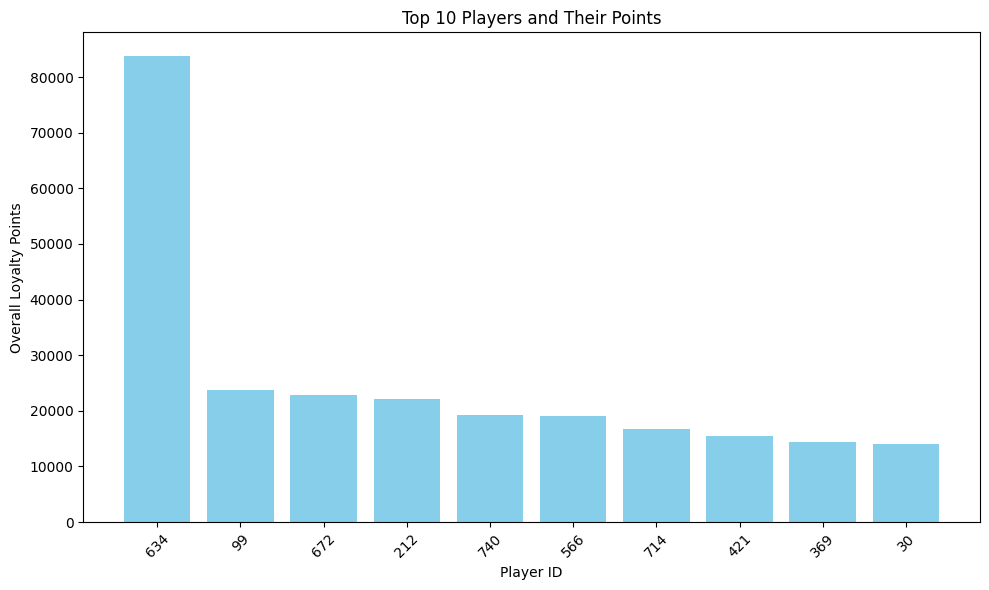

In [32]:
top_10_players = loyalty_points_df.nlargest(10, "Overall_Loyalty_Points")

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_players.index.astype(str), top_10_players["Overall_Loyalty_Points"], color="skyblue")
plt.xlabel("Player ID")
plt.ylabel("Overall Loyalty Points")
plt.title("Top 10 Players and Their Points")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

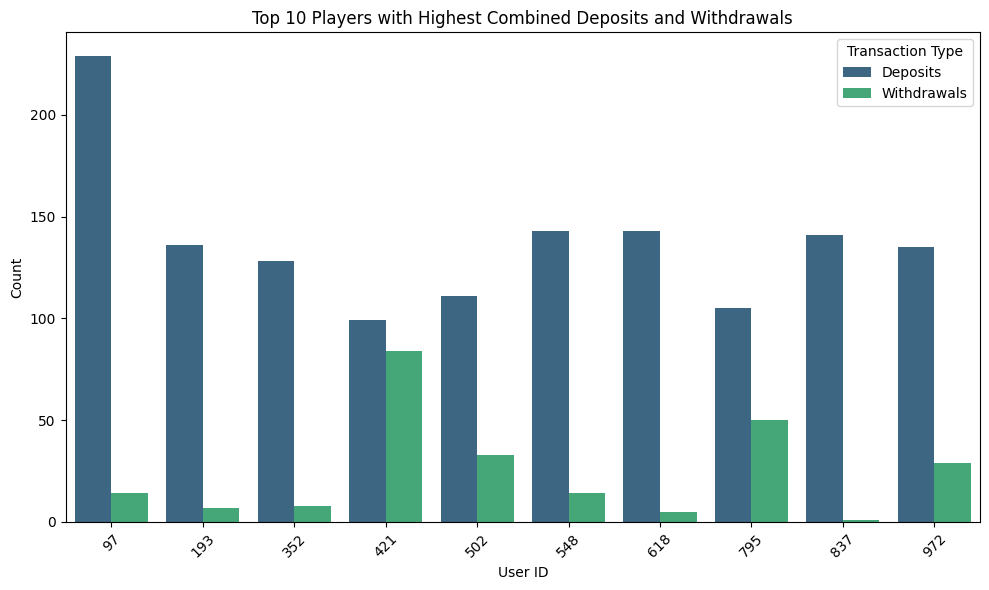

In [33]:

# Calculate total deposits and withdrawals for each user
deposit_counts = deposit_data.groupby("User Id")["Amount"].count().rename("Deposits")
withdrawal_counts = withdrawal_data.groupby("User Id")["Amount"].count().rename("Withdrawals")

# Combine deposit and withdrawal counts
total_transactions = pd.concat([deposit_counts, withdrawal_counts], axis=1).fillna(0)
total_transactions["Total"] = total_transactions["Deposits"] + total_transactions["Withdrawals"]

# Find the top 10 players with the highest total transactions
top_10_players = total_transactions.nlargest(10, "Total").reset_index()

# Melt data for visualization
melted_data = top_10_players.melt(id_vars="User Id", value_vars=["Deposits", "Withdrawals"], 
                                  var_name="Transaction Type", value_name="Count")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x="User Id", y="Count", hue="Transaction Type", palette="viridis")
plt.title("Top 10 Players with Highest Combined Deposits and Withdrawals")
plt.xlabel("User ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Transaction Type")
plt.tight_layout()
plt.show()


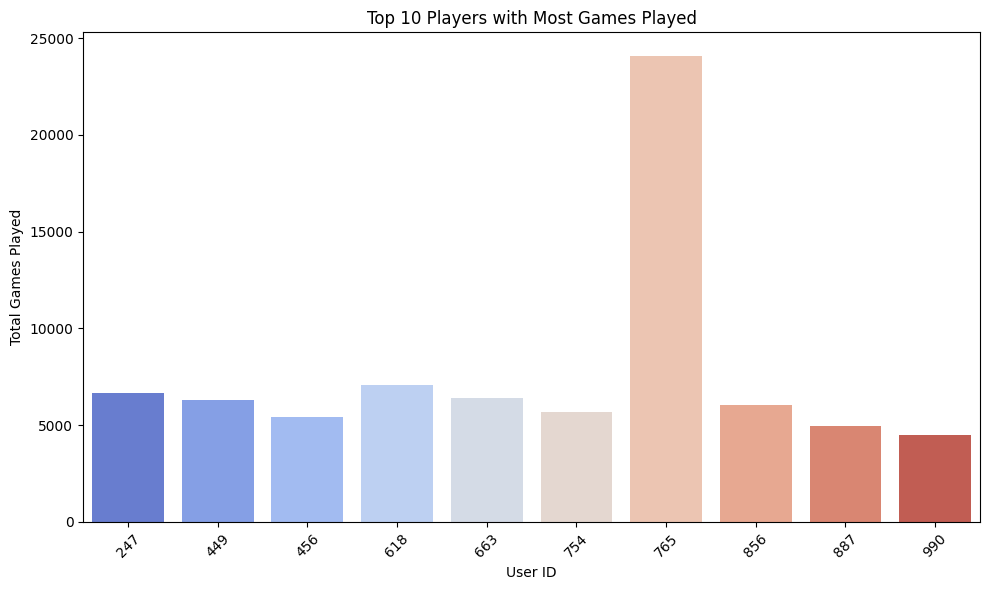

In [34]:

# Group by "User ID" and sum the "Games Played"
games_played_counts = user_gameplay_data.groupby("User ID")["Games Played"].sum()

# Find the top 10 players with the highest games played
top_10_game_players = games_played_counts.nlargest(10).reset_index()
top_10_game_players.columns = ["User ID", "Games Played"]

# Visualization using Seaborn countplot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_game_players, x="User ID", y="Games Played", palette="coolwarm")
plt.title("Top 10 Players with Most Games Played")
plt.xlabel("User ID")
plt.ylabel("Total Games Played")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
# Find total games played by user with User ID 756
user_id_756_games = user_gameplay_data[user_gameplay_data["User ID"] == 765]["Games Played"].sum()

print(f"User ID 756 has played {user_id_756_games} games.")


User ID 756 has played 24097 games.


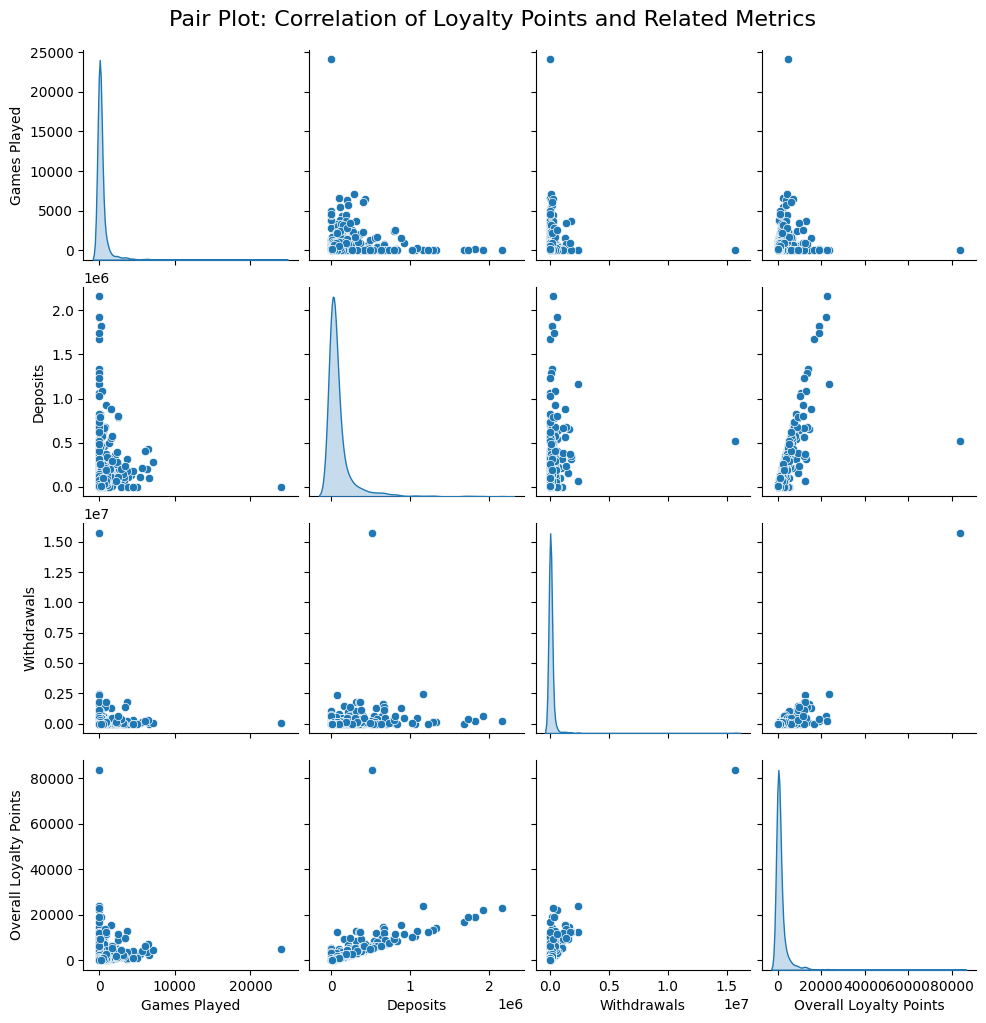

In [36]:

# Select relevant columns for correlation analysis
correlation_data = pd.DataFrame({
    "Games Played": user_gameplay_data.groupby("User ID")["Games Played"].sum(),
    "Deposits": deposit_data.groupby("User Id")["Amount"].sum(),
    "Withdrawals": withdrawal_data.groupby("User Id")["Amount"].sum(),
    "Overall Loyalty Points": loyalty_points_df["Overall_Loyalty_Points"]
}).fillna(0)

# Create a Pair Plot
sns.pairplot(correlation_data, diag_kind="kde", palette="coolwarm", height=2.5)

# Add a title to the plot
plt.suptitle("Pair Plot: Correlation of Loyalty Points and Related Metrics", y=1.02, fontsize=16)
plt.show()


# Part C